# Delta Band PFC Theta Band HPC EMG Like Analysis

An EMG-like signal, often referred to as EMG (Electromyography) signal, is a type of biological signal that represents the electrical activity generated by the contraction of muscle fibers in the human body. EMG signals are commonly used in various fields, including physiology, rehabilitation, and biomedical engineering, to study muscle function and activity.

EMG signals are typically measured in microvolts (µV) and represent the electrical activity of muscles. They consist of electrical potentials generated by the depolarization of muscle cells during muscle contraction. EMG signals are often characterized by their amplitude, frequency content, and duration.

EMG signals are generated when a muscle contracts or when there is muscle activity, including voluntary and involuntary contractions. The level of activity can vary from subtle muscle twitches to strong contractions.

## Load MAT Data

In [1]:
from scipy.io import loadmat
delta_band_pfc = loadmat('synthesised-features/delta_band_pfc.mat')
theta_band_hpc = loadmat('synthesised-features/theta_band_hpc.mat')
emg_like = loadmat('synthesised-features/emg_like_signal.mat')

In [2]:
emg_like.keys()

dict_keys(['__header__', '__version__', '__globals__', 'EMGFromLFP'])

In [3]:
emg_like['EMGFromLFP']['data'];

## Load DataFrame

In [4]:
import numpy as np
import pandas as pd

In [5]:
delta_band_pfc_data = delta_band_pfc['DeltaBand']['data']
delta_band_pfc_timesteps = delta_band_pfc['DeltaBand']['timestamps']

theta_band_hpc_data = theta_band_hpc['ThetaBand']['data']
theta_band_hpc_timesteps = theta_band_hpc['ThetaBand']['timestamps']

emg_like_data = emg_like['EMGFromLFP']['data']
emg_like_timesteps = emg_like['EMGFromLFP']['timestamps']

In [6]:
flattened_delta_pfc_data = np.concatenate(delta_band_pfc_data.all())
delta_pfc_df = pd.DataFrame({'DeltaBandPFC': flattened_delta_pfc_data})

flattened_theta_hpc_data = np.concatenate(theta_band_hpc_data.all())
theta_hpc_df = pd.DataFrame({'ThetaBandHPC': flattened_theta_hpc_data})

flattened_emg_like_data = np.concatenate(emg_like_data.all())
emg_like_df = pd.DataFrame({'EMGLike': flattened_emg_like_data})

In [7]:
delta_pfc_df['Timestep'] = range(1, len(delta_band_pfc_timesteps.all()) + 1)
delta_pfc_df.set_index('Timestep', inplace=True)

theta_hpc_df['Timestep'] = range(1, len(theta_band_hpc_timesteps.all()) + 1)
theta_hpc_df.set_index('Timestep', inplace=True)

emg_like_df['Timestep'] = range(1, len(emg_like_timesteps.all()) + 1)
emg_like_df.set_index('Timestep', inplace=True)

## Plot Timeseries

In [8]:
import matplotlib.pyplot as plt

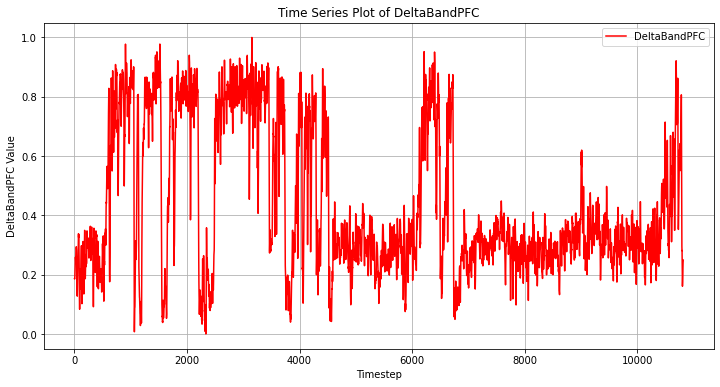

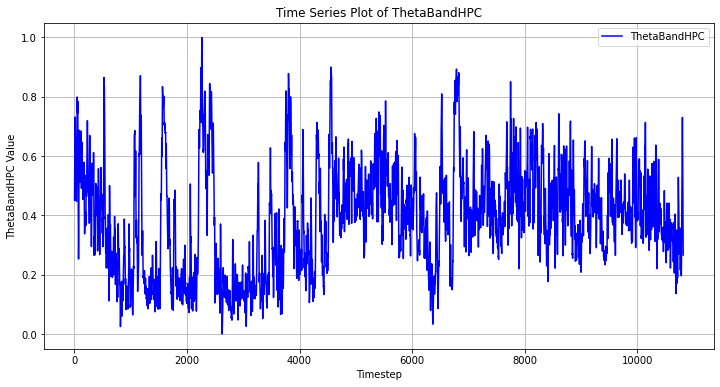

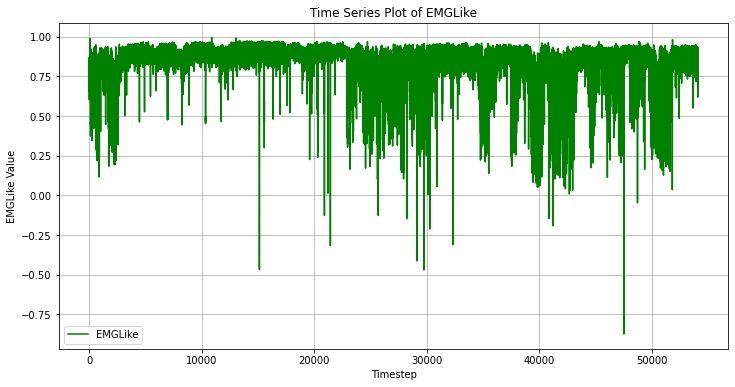

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaBandPFC'], label='DeltaBandPFC', color='red')
plt.title('Time Series Plot of DeltaBandPFC')
plt.xlabel('Timestep')
plt.ylabel('DeltaBandPFC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaBandHPC'], label='ThetaBandHPC', color='blue')
plt.title('Time Series Plot of ThetaBandHPC')
plt.xlabel('Timestep')
plt.ylabel('ThetaBandHPC Value')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')
plt.title('Time Series Plot of EMGLike')
plt.xlabel('Timestep')
plt.ylabel('EMGLike Value')
plt.legend()
plt.grid(True)
plt.show()

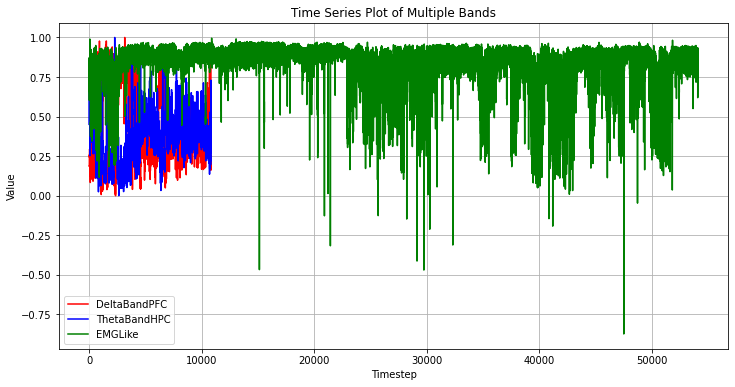

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(delta_pfc_df.index, delta_pfc_df['DeltaBandPFC'], label='DeltaBandPFC', color='red')

plt.plot(theta_hpc_df.index, theta_hpc_df['ThetaBandHPC'], label='ThetaBandHPC', color='blue')

plt.plot(emg_like_df.index, emg_like_df['EMGLike'], label='EMGLike', color='green')

plt.title('Time Series Plot of Multiple Bands')
plt.xlabel('Timestep')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()